In [42]:
!pip install matplotlib seaborn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 4.1 MB/s eta 0:00:00a 0:00:01


In [43]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Команды

In [12]:
def read_commands():
    with open("./commands/commands.json", "r") as json_file:
        commands_info = json.load(json_file)
        
    data = []
    
    for info in commands_info:
        category = info['category']
        commands = info['commands']
        for command in commands:
            data.append({'category': category, 'command': command})
    
    # Создать DataFrame из собранных данных
    return pd.DataFrame(data)

In [13]:
commands_df = read_commands()

In [14]:
commands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  395 non-null    object
 1   command   395 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


In [35]:
commands_df.head()

,category,command
0,Finance Assistant,"Create Budget: ""create_budget"", args: ""income""..."
1,Finance Assistant,"Analyze Expenses: ""analyze_expenses"", args: ""e..."
2,Finance Assistant,"Set Financial Goals: ""set_financial_goals"", ar..."
3,Finance Assistant,"Generate Investment Plan: ""generate_investment..."
4,Finance Assistant,"Calculate Loan Payments: ""calculate_loan_payme..."


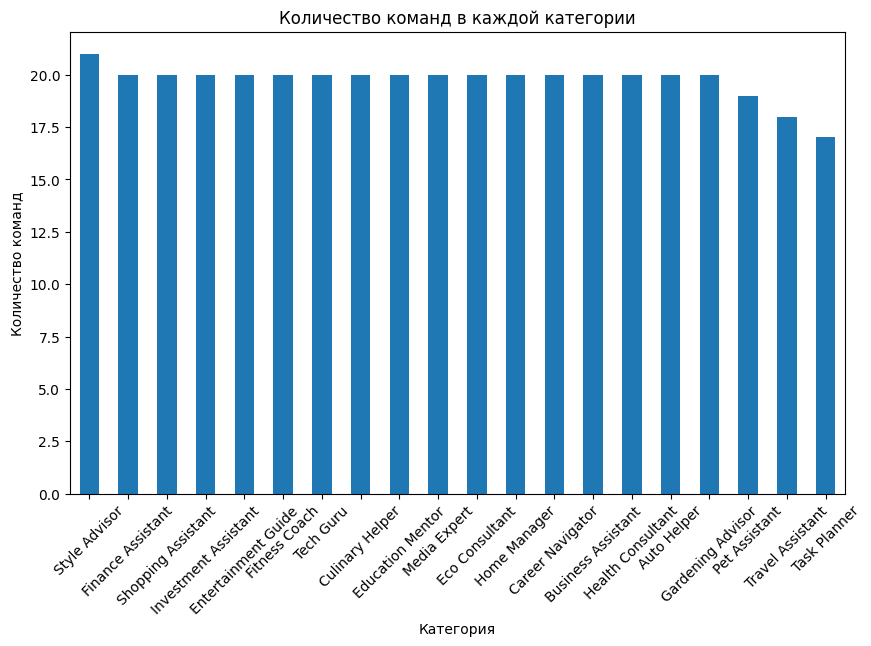

In [15]:
# Создание таблицы с количеством команд в каждой категории
category_counts = commands_df['category'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Категория')
plt.ylabel('Количество команд')
plt.title('Количество команд в каждой категории')
plt.xticks(rotation=45)
plt.show()

Диаграмма представляет количество команд в каждой из различных категорий. Видно, что данные распределены довольно равномерно, за исключением небольших различий в некоторых категориях. Большинство категорий имеют количество команд близкое к 20, что говорит о сбалансированности данных по категориям.

Это равномерное распределение делает данные пригодными для дальнейшего обучения, так как нет чрезмерного перекоса в сторону какой-либо одной категории. Модель, обученная на таких данных, будет иметь возможность более эффективно выполнять задачи по каждой из категорий, не испытывая влияния доминирующих классов.

## Цели

In [32]:
def read_goals():
    data_df = []
    for filename in os.listdir('goals'):
        if filename.endswith('.json'):
            file_path = os.path.join('goals', filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                category = os.path.splitext(filename)[0]
                result_prompts = []
                for command_data in data:
                    command = command_data['command']
                    goals = command_data['goals']
                    for goal in goals:
                        data_df.append({'category': category, 'command': command, 'goal': goal})
    return pd.DataFrame(data_df)

In [33]:
goals_df = read_goals()

In [34]:
goals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10413 entries, 0 to 10412
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10413 non-null  object
 1   command   10413 non-null  object
 2   goal      10413 non-null  object
dtypes: object(3)
memory usage: 244.2+ KB


In [36]:
goals_df.head()

,category,command,goal
0,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...","Allow users to add, edit and delete tasks from..."
1,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...",Provide a clear overview of all tasks in the l...
2,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...",Enable users to prioritize tasks based on thei...
3,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...",Offer the option to set deadlines for each task.
4,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...",Allow users to categorize tasks by project or ...


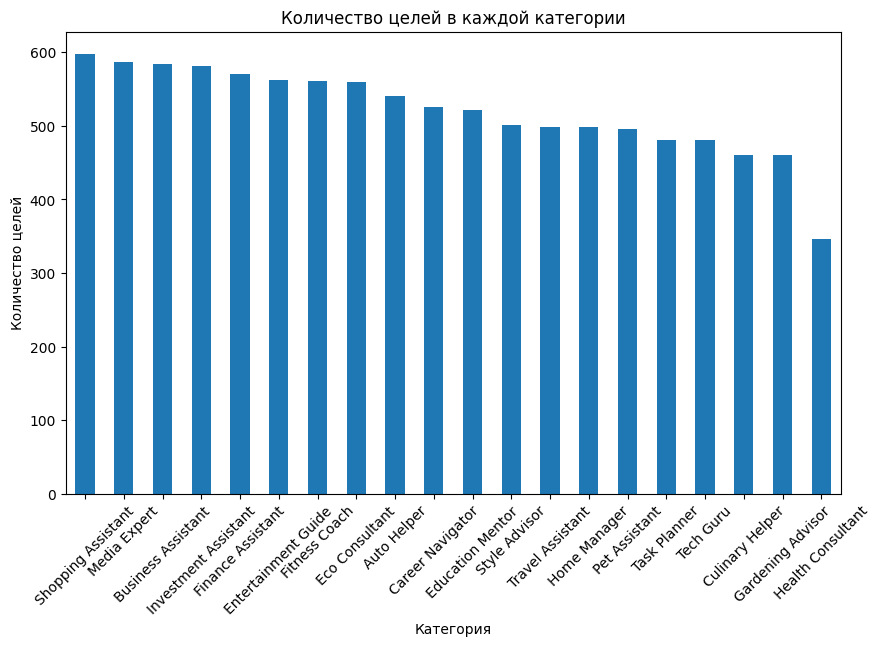

In [40]:
# Создание таблицы с количеством команд в каждой категории
category_counts = goals_df['category'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Категория')
plt.ylabel('Количество целей')
plt.title('Количество целей в каждой категории')
plt.xticks(rotation=45)
plt.show()

Гистограмма, представленная на изображении, показывает количество целей в каждой категории. Видно, что данные распределены относительно равномерно по большинству категорий, что указывает на их нормальное распределение. Многие категории имеют около 500-600 целей, лишь несколько категорий имеют количество целей, заметно ниже, особенно "Health Consultant". Такое распределение данных подходит для дальнейшего использования в обучении моделей машинного обучения, так как сбалансированные данные минимизируют потенциальные перекосы и способствуют более устойчивому и точному обучению модели.

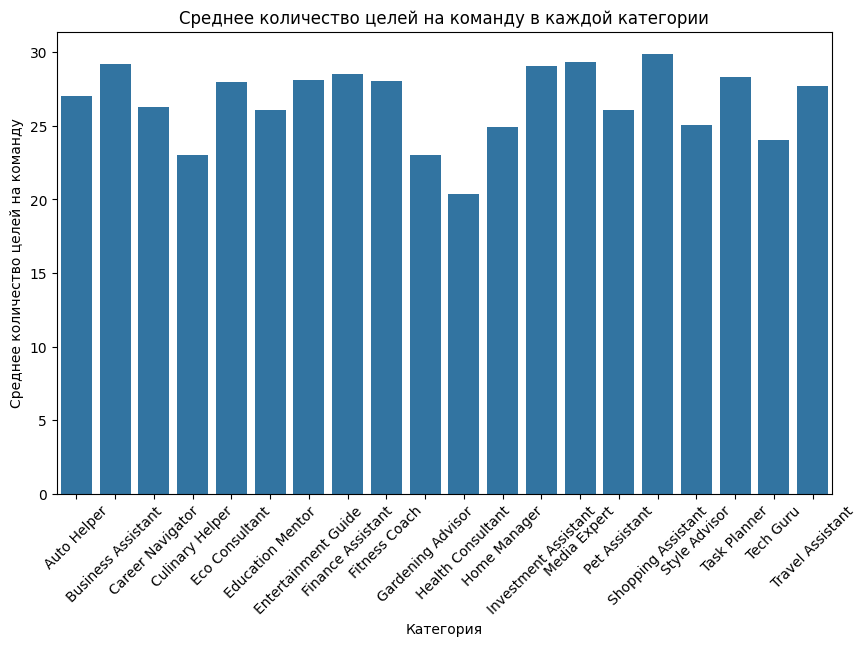

In [53]:
# Создать новый DataFrame с подсчитанными целями для каждой команды
command_goals_count = goals_df.groupby(['category', 'command']).size().reset_index(name='goal_count')

# Найти среднее количество целей для каждой команды в каждой категории
category_command_avg_goals = command_goals_count.groupby('category')['goal_count'].mean().reset_index()

# Построить график
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='goal_count', data=category_command_avg_goals)
plt.xlabel('Категория')
plt.ylabel('Среднее количество целей на команду')
plt.title('Среднее количество целей на команду в каждой категории')
plt.xticks(rotation=45)
plt.show()

На графике представлено среднее количество целей на команду в каждой категории. Видно, что значения варьируются от около 20 до 30, что свидетельствует о небольшой дисперсии и высокой плотности распределения данных вокруг среднего значения. Это отсутствие значительных выбросов и наличие относительно симметричного распределения указывает на то, что данные могут быть близки к нормальному распределению. Для подтверждения нормальности данных следует провести дополнительные статистические тесты, такие как тест Шапиро-Уилка или анализ Q-Q plot. Тем не менее, визуально данные выглядят достаточно равномерно распределенными для дальнейшего использования в различных аналитических или машинных моделях, где нормальное распределение данных является предпочтительным условием.

## Сгенерированные ответы 

In [67]:
def read_promts():
    data_df = []
    for filename in os.listdir('promts'):
        if filename.endswith('.json'):
            file_path = os.path.join('promts', filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                category = os.path.splitext(filename)[0]
                result_prompts = []
                for command_data in data:
                    commands = command_data['commands']
                    goals = command_data['goals']
                    for command in commands:
                        for goal in goals:
                            data_df.append({'category': category, 'command': command, 'goal': goal, "result": command_data['result']})
    return pd.DataFrame(data_df)

In [68]:
result_df = read_promts()

In [69]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14444 entries, 0 to 14443
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  14444 non-null  object
 1   command   14444 non-null  object
 2   goal      14444 non-null  object
 3   result    14444 non-null  object
dtypes: object(4)
memory usage: 451.5+ KB


In [70]:
result_df.head()

,category,command,goal,result
0,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...",Allow users to import tasks from other to-do a...,{'thoughts': {'text': 'I can help you organize...
1,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...",Offer the ability to assign tasks to specific ...,{'thoughts': {'text': 'I can help you organize...
2,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...",Integrate with other productivity tools for se...,{'thoughts': {'text': 'I can help you organize...
3,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...",Offer the ability to collaborate on tasks with...,{'thoughts': {'text': 'I can help you organize...
4,Home Manager,"Create a To-Do List: ""create_to_do_list"", args...",Ensure that the to-do list is accessible acros...,{'thoughts': {'text': 'I can help you organize...


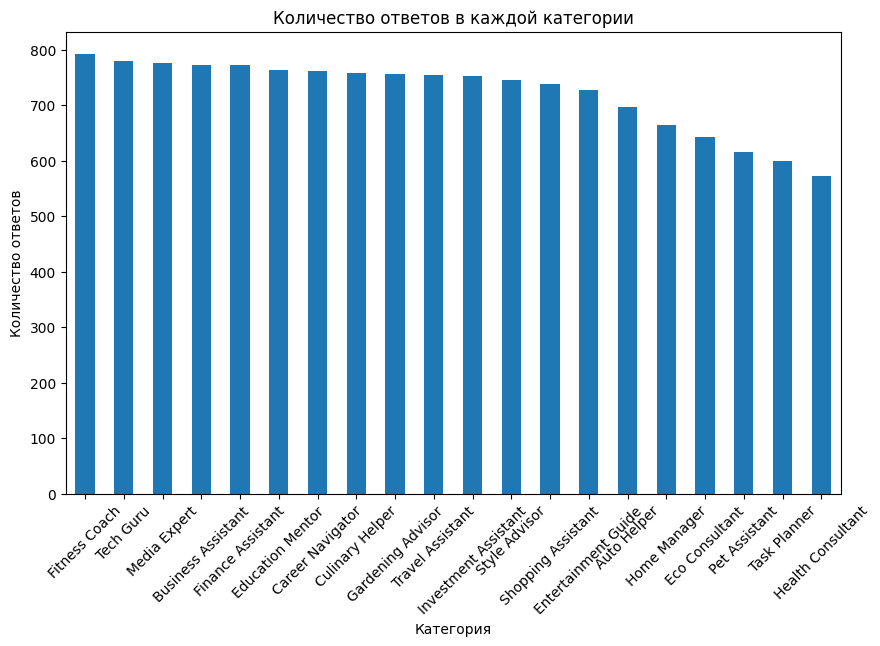

In [71]:
# Создание таблицы с количеством команд в каждой категории
category_counts = result_df['category'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Категория')
plt.ylabel('Количество ответов')
plt.title('Количество ответов в каждой категории')
plt.xticks(rotation=45)
plt.show()

Приведенная гистограмма демонстрирует распределение количества ответов по различным категориям. Из графика видно, что данные распределены достаточно равномерно среди большинства категорий, хотя некоторое уменьшение количества ответов наблюдается в последних нескольких категориях. Однако разность в количестве ответов незначительна, что позволяет утверждать, что данные обладают хорошей степенью гомогенности. Такое равномерное распределение данных положительно скажется на модели машинного обучения, так как это означает сбалансированность классов и уменьшает риск смещения в результатах. Таким образом, данные, представленные на графике, являются подходящими для дальнейшего использования в задачах машинного обучения.

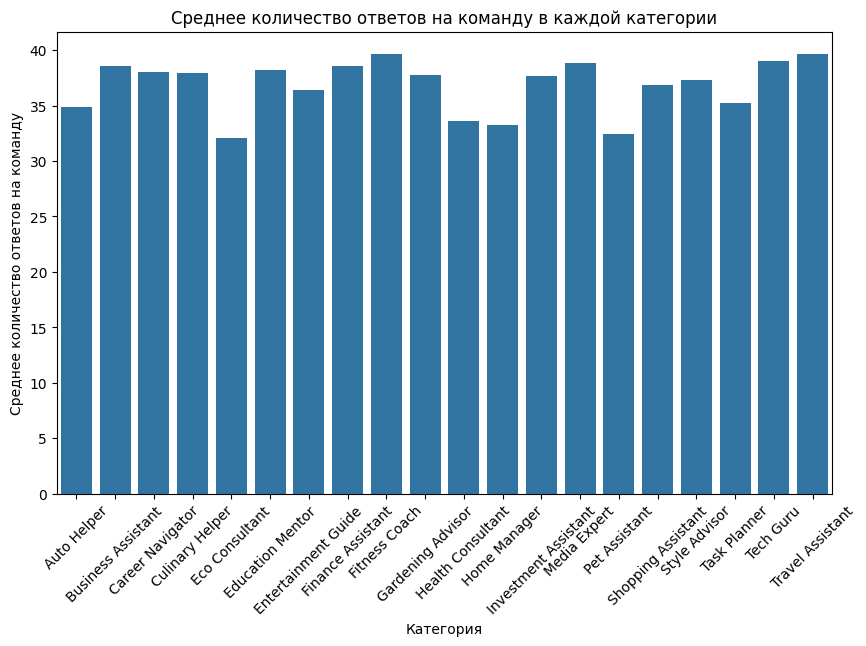

In [78]:
# Создать новый DataFrame с подсчитанными целями для каждой команды
command_result_count = result_df.groupby(['category', 'command']).size().reset_index(name='result_count')

# Найти среднее количество целей для каждой команды в каждой категории
category_command_avg_result = command_result_count.groupby('category')['result_count'].mean().reset_index()

# Построить график
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='result_count', data=category_command_avg_result)
plt.xlabel('Категория')
plt.ylabel('Среднее количество ответов на команду')
plt.title('Среднее количество ответов на команду в каждой категории')
plt.xticks(rotation=45)
plt.show()

На представленном графике видно, что среднее количество ответов на команду в каждой категории находится в пределах от 30 до 40. Такое распределение показывает, что данные являются достаточно равномерно распределенными без значительных выбросов или аномалий. График демонстрирует однородность в количестве ответов среди различных категорий, что указывает на отсутствие значительных диспропорций. Таким образом, эти данные представляются нормально распределенными и подходят для дальнейшего использования в различных аналитических или статистических моделях, где важно учитывать среднее значение и однородность данных.

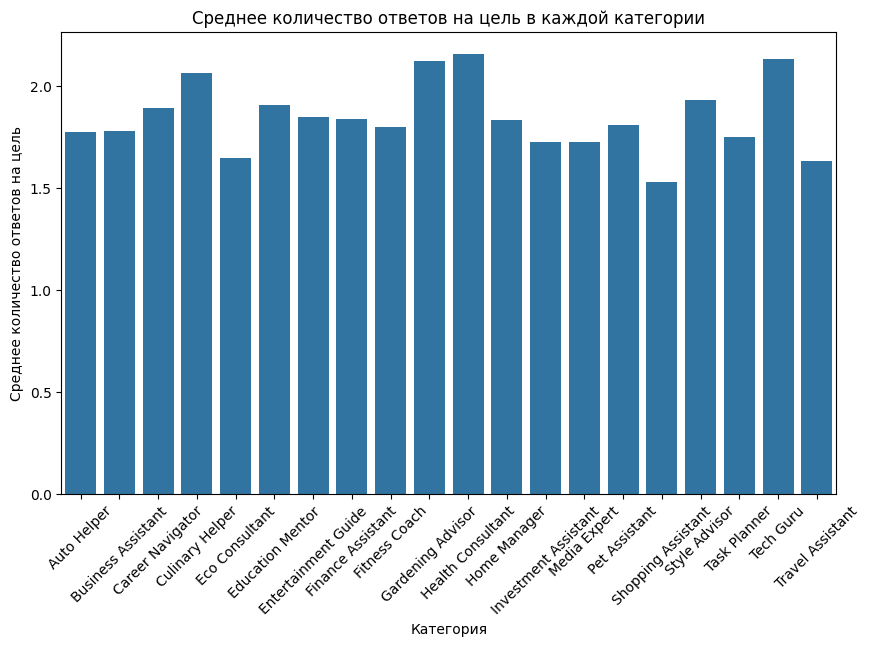

In [81]:
# Создать новый DataFrame с подсчитанными целями для каждой команды
goal_result_count = result_df.groupby(['category', 'goal']).size().reset_index(name='result_count')

# Найти среднее количество целей для каждой команды в каждой категории
category_goal_avg_result = goal_result_count.groupby('category')['result_count'].mean().reset_index()

# Построить график
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='result_count', data=category_goal_avg_result)
plt.xlabel('Категория')
plt.ylabel('Среднее количество ответов на цель')
plt.title('Среднее количество ответов на цель в каждой категории')
plt.xticks(rotation=45)
plt.show()

График иллюстрирует среднее количество ответов на цель в каждой категории и показывает, что данные распределены относительно равномерно. Большинство категорий имеют среднее количество ответов около 2, что указывает на нормальное распределение данных. Изначально можно предположить, что данные не содержат значимых выбросов и крайних значений, что делает их подходящими для последующего использования в обучении моделей. Такой характер распределения обеспечивает надежность и репрезентативность данных, что является важным для качественного построения предсказательных моделей.